### 1. 라이브러리 불러오기

일반 CPU 활용 시

In [1]:
# # 라이브러리 정의 
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import pandas as pd

cuda nvidia gpu 활용 시

In [2]:
# How to check if the code is running on GPU or CPU?

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17356062869723367827
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1417992603
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1617145002200713322
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


intel gpu 활용 시

In [3]:
# import numpy as np
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋 
# from keras.datasets import mnist


In [4]:
import warnings
warnings.filterwarnings(action="ignore")

In [5]:
import pandas as pd
import numpy as np
import cv2
import os
from datetime import datetime

# from tensorflow import keras
from tensorflow import keras
# One-Hot Encoding, Model Plot
from tensorflow.keras.utils import to_categorical, plot_model
# Add Model
from tensorflow.keras import Sequential
# Add Model Layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
# Model Callback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

# Split Data to Train-Test
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

### 2. 데이터 불러오기 및 분리

In [6]:
pwd

'C:\\Users\\kopo\\seccode_교수용\\Session08 - 이미지분류'

In [7]:
basedir = "../images/classImages/"

imageList = []
labelList = []

IMG_SIZE = 48

In [8]:
categories = os.listdir(basedir)
print(categories)

['sm5', '그랜저']


In [9]:
# i=0

# labelPath = os.path.join(basedir, categories[i])
# labelPath

# imagePath = os.listdir(labelPath)

# j=0

# imageFullPath = os.path.join(labelPath, imagePath[j])

# imageFullPath

# imgArray = np.fromfile(imageFullPath, np.uint8)
# img=cv2.imdecode(imgArray, cv2.IMREAD_COLOR)

# import matplotlib.pyplot as plt

# plt.imshow(img)

In [10]:
# 분류 폴더 순환
for i in range(len(categories)):
    labelPath = os.path.join(basedir, categories[i])
    labelPath

    imagePath = os.listdir(labelPath)
    # 폴더별 이미지 순환
    for j in range(len(imagePath)):
        imageFullPath = os.path.join(labelPath, imagePath[j])
        try:
            imgArray = np.fromfile(imageFullPath, np.uint8)
            _img=cv2.imdecode(imgArray, cv2.IMREAD_GRAYSCALE)
            # _img = cv2.imread(imageFullPath, cv2.IMREAD_GRAYSCALE)

            #### 2-1. 이미지 사이즈 변경
            resizedImg = cv2.resize(_img, (IMG_SIZE, IMG_SIZE))
            
            imageList.append(resizedImg)
            labelList.append(i)
        except Exception as e:
            print(e, imageFullPath)
            pass

In [11]:
labelList[1]

0

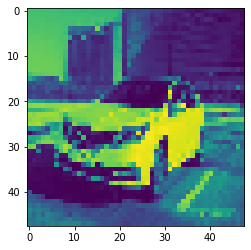

In [12]:
plt.imshow(imageList[2])

In [13]:
# # 분류 폴더 순환
# for i in range(len(categories)):
#     labelPath = os.path.join(basedir, categories[i])
#     labelPath

#     imagePath = os.listdir(labelPath)
#     # 폴더별 이미지 순환
#     for j in range(len(imagePath)):
#         imageFullPath = os.path.join(labelPath, imagePath[j])
#         try:
#             _img = cv2.imread(imageFullPath, cv2.IMREAD_GRAYSCALE)

#             #### 2-1. 이미지 사이즈 변경
#             resizedImg = cv2.resize(_img, (IMG_SIZE, IMG_SIZE))
            
#             imageList.append(resizedImg)
#             labelList.append(i)
#         except Exception as e:
#             print(e, imageFullPath)
#             pass

In [14]:
# 데이터 전치리를 편리하게 하기 위해 형변환 List > Array
imageArray = np.array(imageList)
labelArray = np.array(labelList)

print (imageArray.shape, labelArray.shape)

(1169, 48, 48) (1169,)


In [15]:
# trainData와 testData로 분리
trainData_features,\
testData_features,\
trainData_labels,\
testData_labels = \
    train_test_split(imageArray, labelArray, test_size=0.2, random_state=2)

print(trainData_features.shape, testData_features.shape)
print(trainData_labels.shape, testData_labels.shape)

(935, 48, 48) (234, 48, 48)
(935,) (234,)


In [16]:
# CNN 사용을 위해 features 구조 변경
trainData_features = \
    trainData_features.reshape(len(trainData_features), IMG_SIZE, IMG_SIZE, 1)
testData_features = \
    testData_features.reshape(len(testData_features), IMG_SIZE, IMG_SIZE, 1)

print(trainData_features.shape, testData_features.shape)

(935, 48, 48, 1) (234, 48, 48, 1)


In [17]:
# feature 정규화
trainData_features_norm = trainData_features/255.0
testData_features_norm = testData_features/255.0

print(trainData_features_norm.shape, testData_features_norm.shape)

(935, 48, 48, 1) (234, 48, 48, 1)


In [18]:
# softmax와 결합을 위한 label one-hot encoding
trainData_labels_one = to_categorical(trainData_labels)
testData_labels_one = to_categorical(testData_labels)

print(trainData_labels_one.shape, testData_labels_one.shape)

(935, 2) (234, 2)


### 3. 모델 생성

In [19]:
inputShape = trainData_features[0].shape
inputShape

(48, 48, 1)

In [20]:
outputShape = len(categories)
outputShape

2

In [21]:
# 모델 초기화
model = Sequential()

In [22]:
# 모델 정의
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape=inputShape)) # 초기 레이어 선언

model.add(MaxPool2D(pool_size=2))

model.add(Dropout(0.4)) # 사용할 비율 명시

model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding="same",
                 activation="relu"))

model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(units=outputShape,
                activation="softmax"))

In [23]:
# 모델 Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1

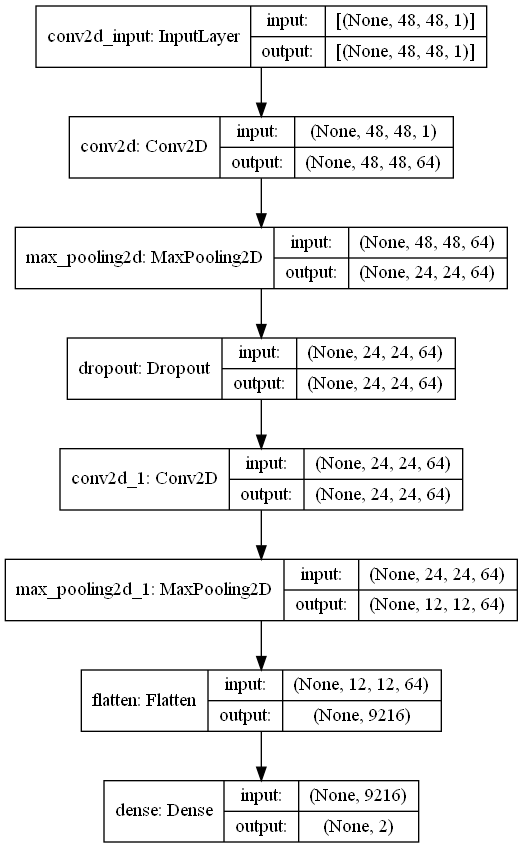

In [24]:
plot_model(model, show_shapes=True)

### 4. 모델 컴파일

In [25]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

### 5. 모델 학습(훈련) 

In [26]:
epochNo = 10

In [27]:
now = datetime.now()
logdt = now.strftime("%Y%m%d_%H%M%S")
logdate = os.path.join("log_star",logdt)

In [28]:
callback_list = [
    EarlyStopping(monitor="val_loss",patience=10),
    ModelCheckpoint(filepath="./star_weight.h5",monitor="val_loss",save_best_only=True, verbose=1),
    TensorBoard(log_dir=logdate, write_graph=True, write_images=True)
]

In [29]:
model.fit(x=trainData_features_norm,
          y=trainData_labels_one,
          epochs=epochNo,
          batch_size=32,
          validation_data=(testData_features_norm, testData_labels_one))

Epoch 1/10
30/30 [==============================] - 9s 40ms/step - loss: 0.6861 - accuracy: 0.5465 - val_loss: 0.6865 - val_accuracy: 0.5855
Epoch 2/10
30/30 [==============================] - 1s 20ms/step - loss: 0.6716 - accuracy: 0.5968 - val_loss: 0.6680 - val_accuracy: 0.6368
Epoch 3/10
30/30 [==============================] - 1s 20ms/step - loss: 0.6608 - accuracy: 0.6107 - val_loss: 0.6500 - val_accuracy: 0.6197
Epoch 4/10
30/30 [==============================] - 1s 22ms/step - loss: 0.6617 - accuracy: 0.6118 - val_loss: 0.6632 - val_accuracy: 0.6026
Epoch 5/10
30/30 [==============================] - 1s 20ms/step - loss: 0.6422 - accuracy: 0.6439 - val_loss: 0.6664 - val_accuracy: 0.6068
Epoch 6/10
30/30 [==============================] - 1s 20ms/step - loss: 0.6317 - accuracy: 0.6578 - val_loss: 0.6546 - val_accuracy: 0.6154
Epoch 7/10
30/30 [==============================] - 1s 20ms/step - loss: 0.6145 - accuracy: 0.6652 - val_loss: 0.6707 - val_accuracy: 0.5812
Epoch 8/10
30

### 6. 모델 추론

In [30]:
model.evaluate(x=testData_features_norm,
               y=testData_labels_one)

8/8 [==============================] - 0s 22ms/step - loss: 0.6735 - accuracy: 0.6239


[0.673531174659729, 0.6239316463470459]

### 7. 모델 예측

In [31]:
def refineImage(testImg):
    # Color to Gray
    greyImg = cv2.cvtColor(testImg, cv2.COLOR_RGB2GRAY)
    # greyImg.shape

    # Image Resize
    resizeImg = cv2.resize(greyImg, (IMG_SIZE, IMG_SIZE))
    # resizeImg.shape

    # Image Reshape
    predictImg = resizeImg.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    # predictImg.shape

    ## Image Normalization
    predictImg_norm = predictImg/255.0
    
    return predictImg_norm

In [32]:
_img = cv2.imread("./sm5image.png", cv2.IMREAD_COLOR)
testImg = refineImage(_img)
testImg.shape

(1, 48, 48, 1)

In [33]:
categories[np.argmax(model.predict(testImg))]

'sm5'

### 8. 모델 저장

In [34]:
# 모델의 구조 저장
model_json = model.to_json()
with open("./model_emotion.json", "w") as json_file:
    json_file.write(model_json)

In [35]:
# 모델 학습내용 저장
model.save_weights("./model_emotion_weight.h5")

# GPU 메모리 릴리즈

In [36]:
from tensorflow.keras import backend as K

K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()